Text(0,0.5,'loss')

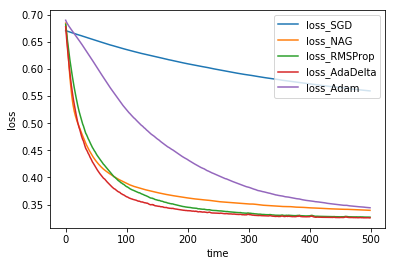

In [10]:
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

#获取数据集
X_train,y_train= load_svmlight_file("H:\\datasets\\a9a.txt")
X_test,y_test=load_svmlight_file("H:\\datasets\\a9at.txt",n_features=123)
X_train=X_train.toarray()
s=X_train.shape[0]
for i in range(y_train.shape[0]):
    if y_train[i] == -1:
        y_train[i] = 0
X_test = X_test.toarray()
s_test = X_test.shape[0]
#同上
for i in range(y_test.shape[0]):
    if y_test[i] == -1:
        y_test[i] = 0
J=J1=J2=J3=J4=np.zeros([123,])

namda=0
learning_rate=0.05
times=500

loss_SGD=np.zeros([times])
loss_NGA=np.zeros([times])
loss_RMS=np.zeros([times])
loss_AdaDelta=np.zeros([times])
loss_Adam=np.zeros([times])
for n in range(times):
    Z=[random.randint(0,s-1)for _ in range(128)]
    
    gra=0
    for i in Z:
        #对训练集部分样本求梯度g
        gra = gra + (1/(1+np.exp(-J.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    gra = gra/len(Z)
    #批量梯度下降
    J = J-learning_rate*gra
    test_sum = 0
    for i in range(s_test):
        test_sum += y_test[i]*np.log(1/(1+np.exp(-J.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-J.T.dot(X_test[i]))))
    #计算miniBatch loss
    loss_SGD[n] = -1/s_test*test_sum
    
    NAG=0.9
    learning_rate=0.01
    
    gra=0
    for i in Z:
        #对训练集部分样本求梯度g
        gra=gra+(1/(1+np.exp(-J1.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    gra=gra/len(Z)
    namda_before = namda
    namda = NAG*namda - learning_rate*gra
    J1=J1-NAG*namda_before + (1+NAG)*namda
    test_sum = 0
    for i in range(s_test):
        test_sum += y_test[i]*np.log(1/(1+np.exp(-J1.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-J1.T.dot(X_test[i]))))
    #计算NAG loss
    loss_NAG[n] = -1/s_test*test_sum

    derta = 0.9
    learning_rate = 0.001
    epis = 1e-8
    #RMSProp
    gra = 0
    P1=0
    for i in Z:
        #对训练集部分样本求梯度g
        gra = gra + (1/(1+np.exp(-J2.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    gra = gra/len(Z)
    P1 = derta*P1 + (1-derta)*gra*gra
    J2 = J2 - learning_rate/np.sqrt(P1+epis)*gra
    test_sum = 0
    for i in range(s_test):
        test_sum += y_test[i]*np.log(1/(1+np.exp(-J2.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-J2.T.dot(X_test[i]))))
    #计算RMSProp loss
    loss_RMS[n] = -1/s_test*test_sum
    
    
#AdaDelta参数
    derta = 0.95
    delta=0    
    eps = 1e-6
    #AdaDelta
    gra = 0
    P2=0
    for i in Z:
        #对训练集部分样本求梯度g
        gra = gra + (1/(1+np.exp(-J3.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    gra = gra/len(Z)
    P2 = derta*P2 + (1-derta)*gra*gra
    deltaJ= -np.sqrt((delta+eps)/(P2+eps))*gra
    J3 = J3 + deltaJ
    delta = derta*delta + (1-derta)*deltaJ*deltaJ
    test_sum = 0
    for i in range(s_test):
        test_sum += y_test[i]*np.log(1/(1+np.exp(-J3.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-J3.T.dot(X_test[i]))))
    #计算AdaDelta loss
    loss_AdaDelta[n] = -1/s_test*test_sum

    derta = 0.999
    beta = 0.9
    eps = 1e-8
    learning = 0.001
    meta=0
    P3=0
    #Adam
    gra = 0
    for i in Z:
        #对训练集部分样本求梯度g
        gra = gra + (1/(1+np.exp(-J4.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    gra=gra/len(Z)
    meta=beta*meta+(1-beta)*gra
    P3=derta*P3 + (1-derta)*gra*gra
    alpha = learning_rate*np.sqrt(1-derta**(n+1))/(1-beta**(n+1))
    J4 = J4-alpha*meta/np.sqrt(P3+eps)
    test_sum = 0
    for i in range(s_test):
        test_sum += y_test[i]*np.log(1/(1+np.exp(-J4.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-J4.T.dot(X_test[i]))))
    #计算Adam loss
    loss_Adam[n] = -1/s_test*test_sum
    
#制图
n = np.arange(times)
plt.plot(n,loss_SGD[n],label='loss_SGD')
plt.plot(n,loss_NAG[n],label='loss_NAG')
plt.plot(n,loss_RMS[n],label='loss_RMSProp')
plt.plot(n,loss_AdaDelta[n],label='loss_AdaDelta')
plt.plot(n,loss_Adam[n],label='loss_Adam')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')